In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [10]:
df=pd.read_csv('kyphosis.csv')
df.head()

,Kyphosis,Age,Number,Start
0,absent,71,3,5
1,absent,158,3,14
2,present,128,4,5
3,absent,2,5,1
4,absent,1,4,15


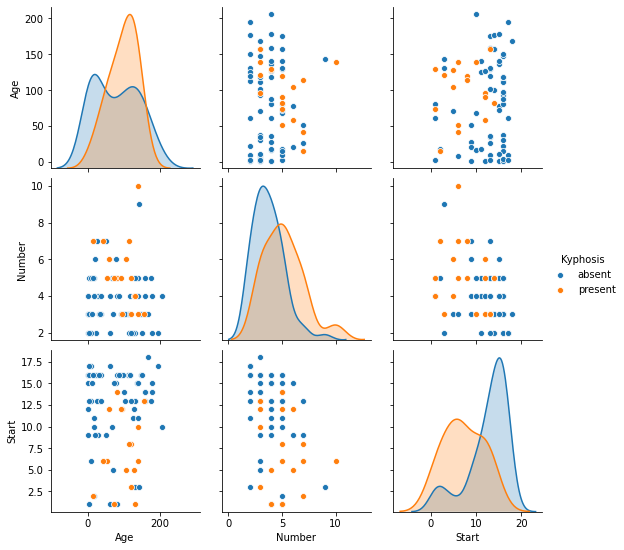

In [11]:
sns.pairplot(df,hue='Kyphosis')

In [5]:
from sklearn.model_selection import train_test_split

In [27]:
X=df.drop('Kyphosis',axis=1)
y=df['Kyphosis']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [28]:
from sklearn.tree import DecisionTreeClassifier

In [29]:
dt=DecisionTreeClassifier()

In [30]:
dt.fit(X_train,y_train)

DecisionTreeClassifier()

In [31]:
pred=dt.predict(X_test)

In [32]:
from sklearn.metrics import confusion_matrix,classification_report

In [33]:
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

[[12  5]
 [ 6  2]]
              precision    recall  f1-score   support

      absent       0.67      0.71      0.69        17
     present       0.29      0.25      0.27         8

    accuracy                           0.56        25
   macro avg       0.48      0.48      0.48        25
weighted avg       0.54      0.56      0.55        25



In [34]:
from sklearn.ensemble import RandomForestClassifier

In [48]:
rfc=RandomForestClassifier(n_estimators=200)

In [49]:
rfc.fit(X_train,y_train)

RandomForestClassifier(n_estimators=200)

In [50]:
pred=rfc.predict(X_test)

In [51]:
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

[[17  0]
 [ 6  2]]
              precision    recall  f1-score   support

      absent       0.74      1.00      0.85        17
     present       1.00      0.25      0.40         8

    accuracy                           0.76        25
   macro avg       0.87      0.62      0.62        25
weighted avg       0.82      0.76      0.71        25



In [52]:
df['Kyphosis'].value_counts()

absent     64
present    17
Name: Kyphosis, dtype: int64

In [53]:
#install pydot and graphviz(need to download) to visualize decision trees
#not possible for random forest as 100s of trees drawn

In [54]:
df=pd.read_csv('loan_data.csv')
df.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


In [59]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
credit.policy,9578.0,0.804970,0.396245,0.000000,1.000000,1.000000,1.000000,1.000000e+00
int.rate,9578.0,0.122640,0.026847,0.060000,0.103900,0.122100,0.140700,2.164000e-01
installment,9578.0,319.089413,207.071301,15.670000,163.770000,268.950000,432.762500,9.401400e+02
log.annual.inc,9578.0,10.932117,0.614813,7.547502,10.558414,10.928884,11.291293,1.452835e+01
dti,9578.0,12.606679,6.883970,0.000000,7.212500,12.665000,17.950000,2.996000e+01
fico,9578.0,710.846314,37.970537,612.000000,682.000000,707.000000,737.000000,8.270000e+02
days.with.cr.line,9578.0,4560.767197,2496.930377,178.958333,2820.000000,4139.958333,5730.000000,1.763996e+04
revol.bal,9578.0,16913.963876,33756.189557,0.000000,3187.000000,8596.000000,18249.500000,1.207359e+06
revol.util,9578.0,46.799236,29.014417,0.000000,22.600000,46.300000,70.900000,1.190000e+02
inq.last.6mths,9578.0,1.577469,2.200245,0.000000,0.000000,1.000000,2.000000,3.300000e+01


Text(0.5, 0, 'FICO')

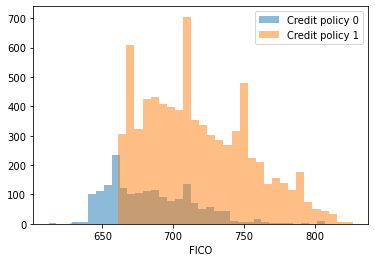

In [74]:
plt.hist(df[df['credit.policy']==0]['fico'],alpha=0.5,bins=35,label='Credit policy 0')
plt.hist(df[df['credit.policy']==1]['fico'],alpha=0.5,bins=35,label='Credit policy 1')
plt.legend()
plt.xlabel('FICO')

Text(0.5, 0, 'FICO')

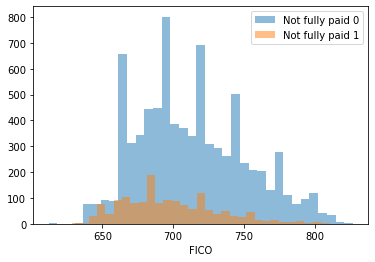

In [76]:
plt.hist(df[df['not.fully.paid']==0]['fico'],alpha=0.5,bins=35,label='Not fully paid 0')
plt.hist(df[df['not.fully.paid']==1]['fico'],alpha=0.5,bins=35,label='Not fully paid 1')
plt.legend()
plt.xlabel('FICO')

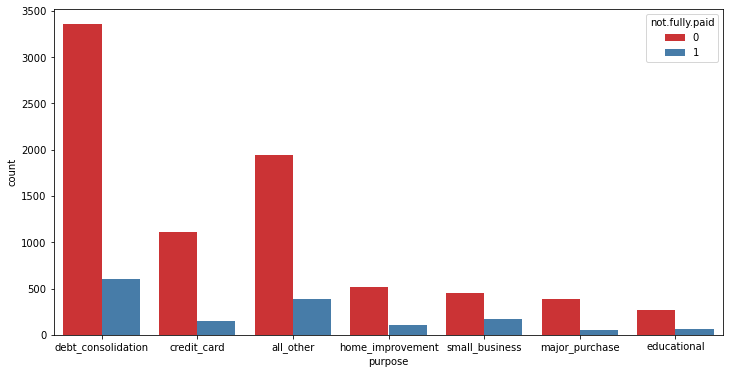

In [81]:
plt.figure(figsize=(12,6))
sns.countplot(df['purpose'],hue=df['not.fully.paid'],palette='Set1')

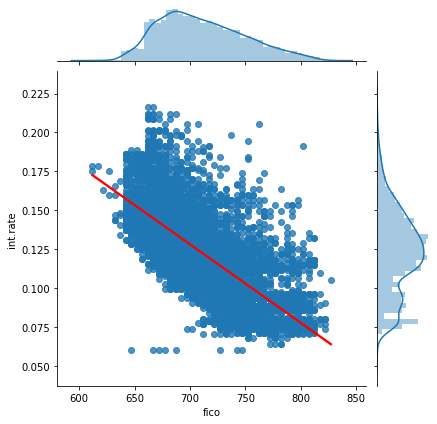

In [99]:
sns.jointplot(df['fico'],df['int.rate'],kind='reg',joint_kws={'line_kws':{'color':'red'}})

<Figure size 864x432 with 0 Axes>

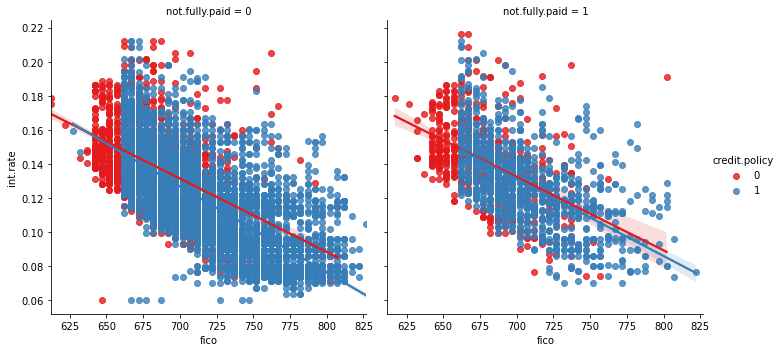

In [98]:
plt.figure(figsize=(12,6))
sns.lmplot('fico','int.rate',data=df,hue='credit.policy',col='not.fully.paid',palette='Set1')

In [101]:
cat_feats=['purpose']
cat_feats

['purpose']

In [112]:
df1=pd.get_dummies(df,columns=cat_feats,drop_first=True)
df1.head()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_major_purchase,purpose_small_business
0,1,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0,0,1,0,0,0,0
1,1,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0,1,0,0,0,0,0
2,1,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0,0,1,0,0,0,0
3,1,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0,0,1,0,0,0,0
4,1,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0,1,0,0,0,0,0


In [113]:
X=df1.drop('not.fully.paid',axis=1)
y=df1['not.fully.paid']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [114]:
dt=DecisionTreeClassifier()
dt.fit(X_train,y_train)

DecisionTreeClassifier()

In [117]:
pred=dt.predict(X_test)

In [118]:
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

[[1987  444]
 [ 338  105]]
              precision    recall  f1-score   support

           0       0.85      0.82      0.84      2431
           1       0.19      0.24      0.21       443

    accuracy                           0.73      2874
   macro avg       0.52      0.53      0.52      2874
weighted avg       0.75      0.73      0.74      2874



In [143]:
rfc=RandomForestClassifier(n_estimators=300)

In [144]:
rfc.fit(X_train,y_train)

RandomForestClassifier(n_estimators=300)

In [145]:
pred=rfc.predict(X_test)

In [146]:
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

[[2419   12]
 [ 435    8]]
              precision    recall  f1-score   support

           0       0.85      1.00      0.92      2431
           1       0.40      0.02      0.03       443

    accuracy                           0.84      2874
   macro avg       0.62      0.51      0.47      2874
weighted avg       0.78      0.84      0.78      2874

